![alt text](https://raw.githubusercontent.com/DarleySoares/Data-Science/master/Machine_Learning_Casas_para_alugar_no_Brasil/images/cities.png)

# Machine Learning: Casas para alugar no Brasil

## 1 - Coleta dos dados

In [1]:
# Ignora avisos
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importa as bibliotecas que serão utilizadas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

dv = modulo15.dataviz()

In [4]:
# Lê os dados do dataset
df = pd.read_csv('https://raw.githubusercontent.com/DarleySoares/Data-Science/master/Machine_Learning_Casas_para_alugar_no_Brasil/data/data.csv')

# Verifica as informações do tamanho do dataset
print('QUANTIDADE DE LINHAS: {}'.format(df.shape[0]))
print('QUANTIDADE DE COLUNAS: {}'.format(df.shape[1]))

QUANTIDADE DE LINHAS: 10692
QUANTIDADE DE COLUNAS: 13


In [5]:
# Verifica se existe linhad duplicadas
df.loc[df.duplicated(subset = None, keep = 'first')]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
244,Porto Alegre,47,1,1,1,1,not acept,furnished,400,2200,0,33,2633
920,Belo Horizonte,40,1,1,1,2,not acept,furnished,0,970,0,13,983
1060,São Paulo,136,3,3,3,13,acept,not furnished,1430,4206,364,54,6054
1064,São Paulo,20,1,1,0,5,acept,furnished,602,1800,130,23,2555
1108,Campinas,184,4,3,4,-,acept,not furnished,0,3240,220,49,3509
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10560,Porto Alegre,40,1,1,1,9,not acept,furnished,1300,1200,68,18,2586
10569,Belo Horizonte,20,1,1,1,-,acept,furnished,0,1100,0,15,1115
10623,Porto Alegre,47,1,1,1,1,not acept,furnished,400,2200,0,33,2633
10640,São Paulo,27,1,1,0,5,not acept,not furnished,1405,3500,1,45,4951


In [6]:
df = df.drop_duplicates(keep = 'first')

# Verifica as informações do tamanho do dataset
print('QUANTIDADE DE LINHAS: {}'.format(df.shape[0]))
print('QUANTIDADE DE COLUNAS: {}'.format(df.shape[1]))

QUANTIDADE DE LINHAS: 10334
QUANTIDADE DE COLUNAS: 13


In [7]:
# Verifica as 5 primeiras linhas do dataset
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [8]:
df.columns = ['cidade','area','quartos','banheiros','vagas_garagem','andar','aceita_animais','mobiliada','condominio','aluguel','contribuicao_predial','seguro_contra_fogo','total']

In [9]:
# Faz uma análise estatística sobre o conjunto de dados
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
area,10334.0,152.439423,545.875595,11.0,59.00,95.0,190.00,46335.0
quartos,10334.0,2.539965,1.168185,1.0,2.00,3.0,3.00,13.0
banheiros,10334.0,2.268725,1.414650,1.0,1.00,2.0,3.00,10.0
vagas_garagem,10334.0,1.644475,1.598527,0.0,1.00,1.0,2.00,12.0
condominio,10334.0,1091.243952,11446.092263,0.0,180.00,571.0,1286.75,1117000.0
aluguel,10334.0,3966.296013,3436.190007,450.0,1598.25,2750.0,5000.00,45000.0
contribuicao_predial,10334.0,376.929263,3160.602165,0.0,41.00,130.0,389.75,313700.0
seguro_contra_fogo,10334.0,54.264273,48.164380,3.0,21.00,37.0,70.00,677.0
total,10334.0,5488.943488,12669.110756,499.0,2116.00,3685.5,6912.00,1120000.0


In [10]:
df = df.loc[df.condominio < 20000]
df = df.loc[df.total < 60000]
df = df.loc[df.area < 3000]

## 2 - Análise exploratória

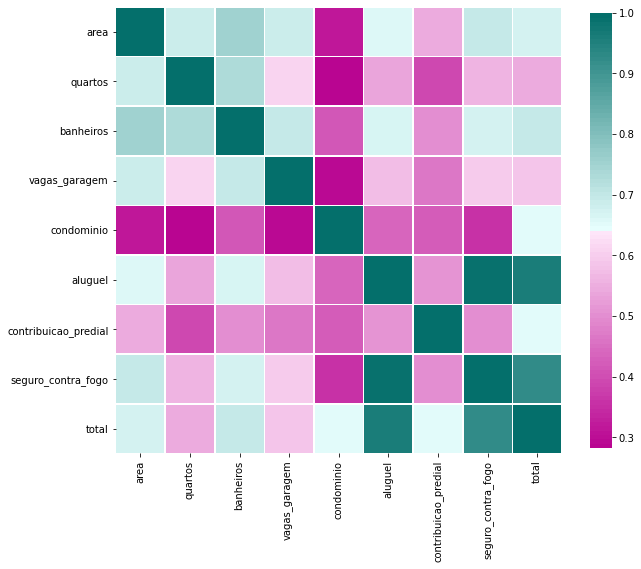

In [172]:
corr = df.corr()
f, ax = plt.subplots(figsize= (10, 10))
cmap = sns.diverging_palette(328,186, s= 99, l= 42, sep = 1, n = 100)
sns.heatmap(corr, cmap = cmap, vmax = 1, square = True, linewidths= .5, cbar_kws= {'shrink': 0.8})
plt.show()

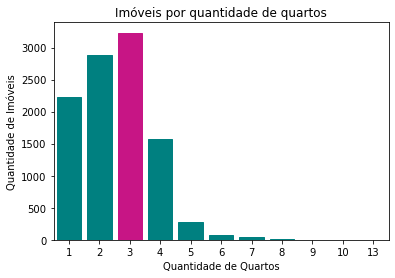

In [173]:
values = df.quartos.value_counts().values
ax = sns.barplot(x = df.quartos.value_counts().index, y = df.quartos.value_counts().values)
color = [bar.set_color('mediumvioletred') if bar.get_height() == max(values) else bar.set_color('teal') for bar in ax.patches]

plt.xlabel('Quantidade de Quartos')
plt.ylabel('Quantidade de Imóveis')
plt.title('Imóveis por quantidade de quartos')
plt.show()

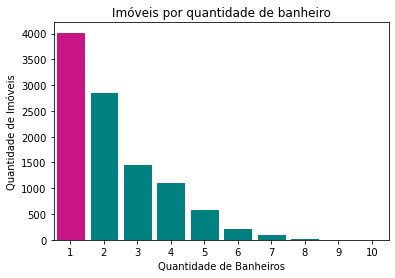

In [174]:
values = df.banheiros.value_counts().values
ax = sns.barplot(x = df.banheiros.value_counts().index, y = df.banheiros.value_counts().values)
color = [bar.set_color('mediumvioletred') if bar.get_height() == max(values) else bar.set_color('teal') for bar in ax.patches]

plt.xlabel('Quantidade de Banheiros')
plt.ylabel('Quantidade de Imóveis')
plt.title('Imóveis por quantidade de banheiro')
plt.show()

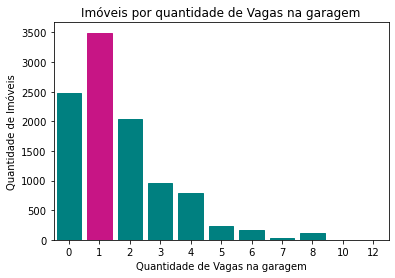

In [175]:
values = df.vagas_garagem.value_counts().values
ax = sns.barplot(x = df.vagas_garagem.value_counts().index, y = df.vagas_garagem.value_counts().values)
color = [bar.set_color('mediumvioletred') if bar.get_height() == max(values) else bar.set_color('teal') for bar in ax.patches]

plt.xlabel('Quantidade de Vagas na garagem')
plt.ylabel('Quantidade de Imóveis')
plt.title('Imóveis por quantidade de Vagas na garagem')
plt.show()

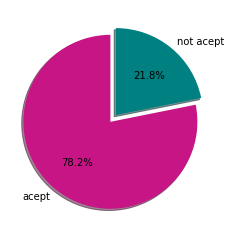

In [176]:
index = values = df.aceita_animais.value_counts().index
values = df.aceita_animais.value_counts().values
colors = ['mediumvioletred' if pie == max(values) else 'teal' for pie in values]
explode = [0.1 if pie == max(values) else 0 for pie in values]
ax = plt.pie(values, labels = index, startangle = 90, shadow = True, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.show()

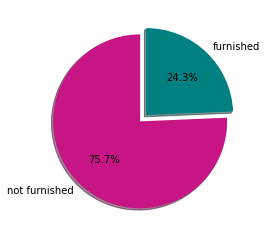

In [177]:
index = values = df.mobiliada.value_counts().index
values = df.mobiliada.value_counts().values
colors = ['mediumvioletred' if pie == max(values) else 'teal' for pie in values]
explode = [0.1 if pie == max(values) else 0 for pie in values]
ax = plt.pie(values, labels = index, startangle = 90, shadow = True, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.show()

In [178]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
area,10325.0,144.381308,135.380416,11.0,59.0,95.0,190.0,2000.0
quartos,10325.0,2.539758,1.167614,1.0,2.0,3.0,3.0,13.0
banheiros,10325.0,2.267700,1.413463,1.0,1.0,2.0,3.0,10.0
vagas_garagem,10325.0,1.644358,1.598202,0.0,1.0,1.0,2.0,12.0
condominio,10325.0,931.928426,1138.893115,0.0,180.0,570.0,1284.0,15000.0
aluguel,10325.0,3963.875351,3432.338084,450.0,1590.0,2750.0,5000.0,45000.0
contribuicao_predial,10325.0,344.798838,688.153378,0.0,40.0,130.0,387.0,28120.0
seguro_contra_fogo,10325.0,54.235642,48.125683,3.0,21.0,37.0,70.0,677.0
total,10325.0,5295.033898,4522.729011,499.0,2114.0,3683.0,6903.0,54430.0


Text(0.5, 1.0, 'Histograma para a Área do imóvel')

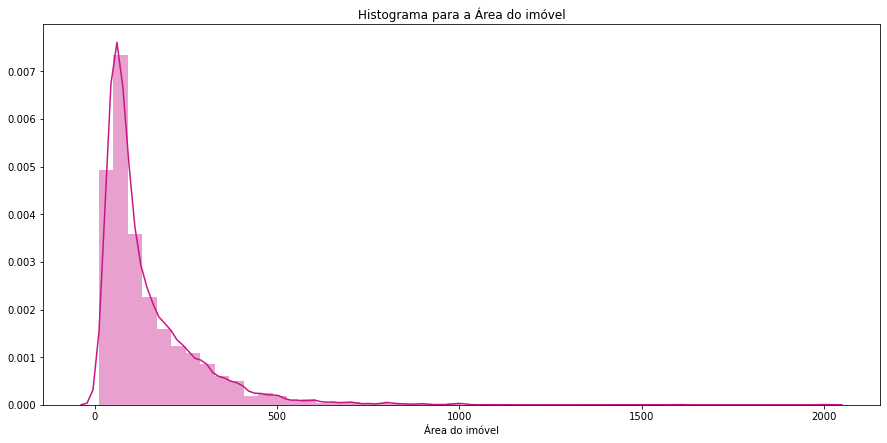

In [184]:
fig, ax = plt.subplots(figsize = (15,7))
sns.distplot(df.area, color = 'mediumvioletred')
plt.xlabel('Área do imóvel')
plt.title('Histograma para a Área do imóvel')
plt.show()

Text(0.5, 1.0, 'Histograma para o valor do condomínio')

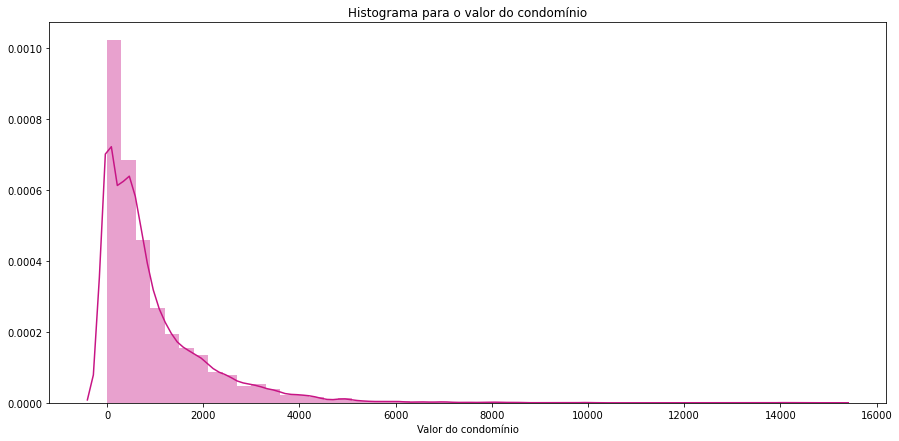

In [179]:
fig, ax = plt.subplots(figsize = (15,7))
sns.distplot(df.condominio, color = 'mediumvioletred')
plt.xlabel('Valor do condomínio')
plt.title('Histograma para o valor do condomínio')
plt.show()

Text(0.5, 1.0, 'Histograma para o valor total')

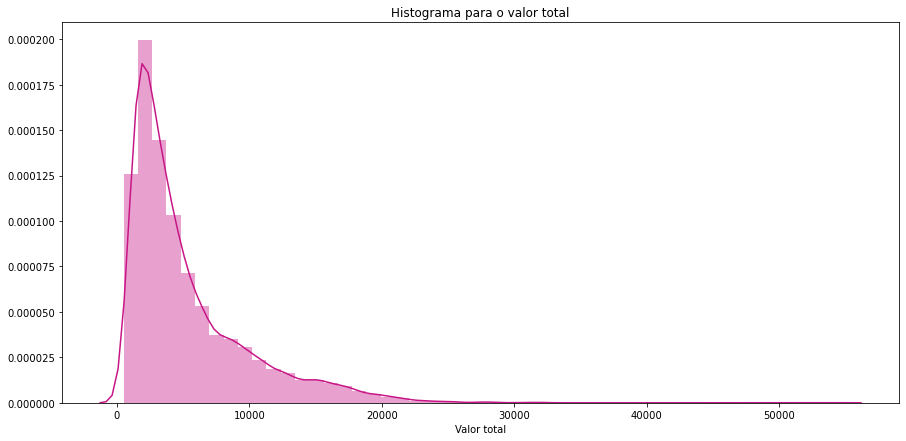

In [186]:
fig, ax = plt.subplots(figsize = (15,7))
sns.distplot(df.total, color = 'mediumvioletred')
plt.xlabel('Valor total')
plt.title('Histograma para o valor total')
plt.show()

Text(0.5, 1.0, 'Valor médio dos imóveis por cidade')

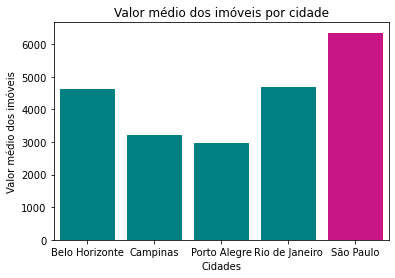

In [181]:
agrupamento = df.groupby(['cidade']).total.mean()
cidades = agrupamento.index
media = agrupamento.values
ax = sns.barplot(x = cidades, y = media)
color = [bar.set_color('mediumvioletred') if bar.get_height() == max(media) else bar.set_color('teal') for bar in ax.patches]
plt.xlabel('Cidades')
plt.ylabel('Valor médio dos imóveis')
plt.title('Valor médio dos imóveis por cidade')

## 3 - Pré processamento de dados

## 4 - Modelo preditivo